# Importamos las librerías

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import datetime

# Análisis de la primera planta de generación de energía

In [2]:
data_1= pd.read_csv("../data/datos_Enero.csv")
data_2= pd.read_csv("../data/datos_marzo.csv")
data_3= pd.read_csv("../data/datos_Junio.csv")
data_4= pd.read_csv("../data/datos_Noviembre.csv")
data=pd.concat([data_1, data_2, data_3, data_4], axis=0)

In [16]:
data.columns

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'QV2M', 'RH2M', 'PRECTOTCORR',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_KT',
       'ALLSKY_SFC_PAR_TOT', 'TS', 'PS', 'ALLSKY_SFC_LW_DWN',
       'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB',
       'ALLSKY_SFC_UV_INDEX', 'T2MDEW', 'WS2M'],
      dtype='object')

In [17]:
promedio_dia=data.groupby(["YEAR","MO", "DY"])['ALLSKY_SFC_SW_DWN'].mean().reset_index()
promedio_dia["DATE"] = pd.to_datetime(promedio_dia["YEAR"].astype(str) + promedio_dia["MO"].astype(str) + promedio_dia["DY"].astype(str), format="%Y%m%d")
promedio_dia


,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,DATE
0,2020,1,1,5.57635,2020-01-01
1,2020,1,2,5.73945,2020-01-02
2,2020,1,3,6.03050,2020-01-03
3,2020,1,4,6.25715,2020-01-04
4,2020,1,5,6.30060,2020-01-05
...,...,...,...,...,...
361,2020,12,27,5.50675,2020-12-27
362,2020,12,28,4.48665,2020-12-28
363,2020,12,29,4.16785,2020-12-29
364,2020,12,30,4.82260,2020-12-30


/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_275/4287415096.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(promedio_dia, x="DATE", y='ALLSKY_SFC_SW_DWN', palette="inferno")
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/carl

Text(0.5, 1.0, 'Promedio de irradiación durante el año 2020')

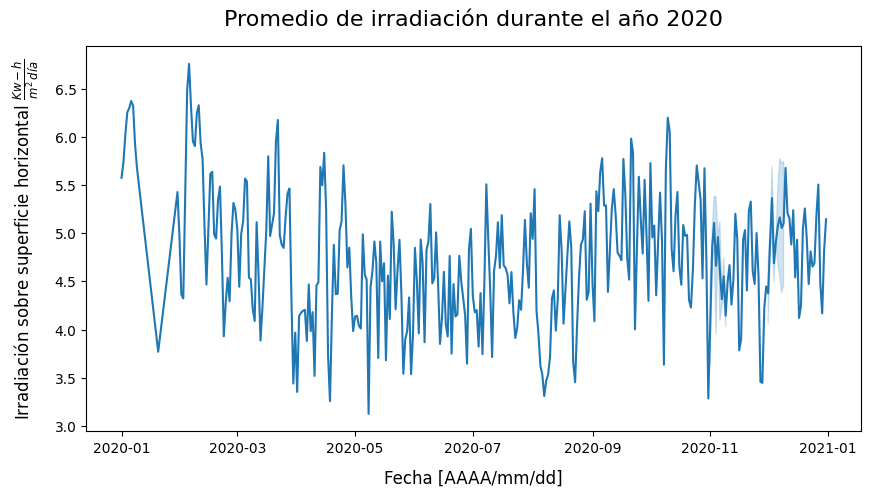

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(promedio_dia, x="DATE", y='ALLSKY_SFC_SW_DWN', palette="inferno")
plt.xlabel("Fecha [AAAA/mm/dd]", fontsize=12, labelpad=10)
plt.ylabel(r"Irradiación sobre superficie horizontal $\frac{Kw-h}{m^2\/día}$", fontsize=12, labelpad=10)
plt.title("Promedio de irradiación durante el año 2020", fontsize=16, pad=15)

In [19]:
promedio_dia.columns

Index(['YEAR', 'MO', 'DY', 'ALLSKY_SFC_SW_DWN', 'DATE'], dtype='object')

In [114]:
estadisticas_mensuales=promedio_dia.groupby("MO")[ 'ALLSKY_SFC_SW_DWN'].mean().reset_index().drop(columns=["MO"])
estadisticas_mensuales.describe()

,ALLSKY_SFC_SW_DWN
count,12.000000
mean,4.745013
std,0.354454
min,4.316926
25%,4.488215
50%,4.657658
75%,5.002652
max,5.303500


/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


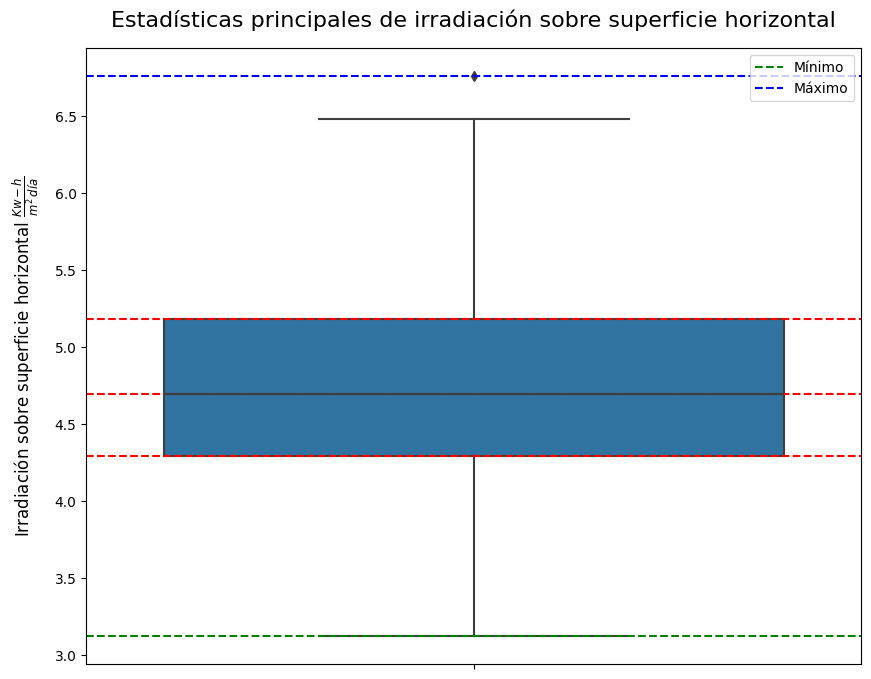

In [63]:
df = promedio_dia
# Calcular los percentiles y el rango
percentiles = [0.25, 0.50, 0.75]
percentile_values = df['ALLSKY_SFC_SW_DWN'].quantile(percentiles)
min_value = df['ALLSKY_SFC_SW_DWN'].min()
max_value = df['ALLSKY_SFC_SW_DWN'].max()

# Crear el diagrama de caja y bigotes
plt.figure(figsize=(10,8))
sns.boxplot(y=df['ALLSKY_SFC_SW_DWN'])

# Agregar las líneas para los percentiles
for percentile in percentile_values:
    plt.axhline(percentile, color='r', linestyle='--')

# Agregar las líneas para el mínimo y máximo

plt.axhline(min_value, color='g', linestyle='--', label='Mínimo')
plt.axhline(max_value, color='b', linestyle='--', label='Máximo')

# Configurar las etiquetas y el título
plt.ylabel(r"Irradiación sobre superficie horizontal $\frac{Kw-h}{m^2\/día}$", labelpad=10, fontsize=12)
plt.title('Estadísticas principales de irradiación sobre superficie horizontal', pad=15, fontsize=16)
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

In [107]:
promedio_dia

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,DATE
0,2020,1,1,5.57635,2020-01-01
1,2020,1,2,5.73945,2020-01-02
2,2020,1,3,6.03050,2020-01-03
3,2020,1,4,6.25715,2020-01-04
4,2020,1,5,6.30060,2020-01-05
...,...,...,...,...,...
361,2020,12,27,5.50675,2020-12-27
362,2020,12,28,4.48665,2020-12-28
363,2020,12,29,4.16785,2020-12-29
364,2020,12,30,4.82260,2020-12-30


/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


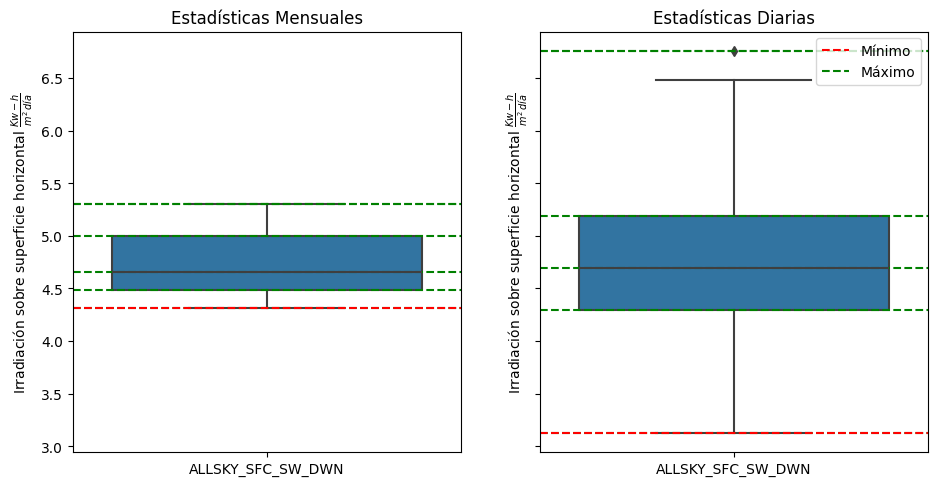

In [120]:
# Datos de ejemplo (mensuales)
# estadisticas_mensuales = datos_dia["ALLSKY_SFC_SW_DWN"]
# # Datos de ejemplo (diarios)
datos_dia = promedio_dia[["ALLSKY_SFC_SW_DWN"]]

# Crear DataFrames con los datos
# estadisticas_mensuales = pd.DataFrame({"ALLSKY_SFC_SW_DWN": estadisticas_mensuales, 'Tipo': 'Mensual'})
# datos_dia = pd.DataFrame({"ALLSKY_SFC_SW_DWN": datos_dia, 'Tipo': 'Diario'})

# Crear el gráfico de caja y bigotes utilizando seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

# Gráfico para los datos mensuales
sns.boxplot(estadisticas_mensuales, ax=ax1)
ax1.set_title('Estadísticas Mensuales')
ax1.set_ylabel(r"Irradiación sobre superficie horizontal $\frac{Kw-h}{m^2\/día}$")

ax1.set_xlabel("dfd")
# Calcular y mosrar los percentiles, mínimo y máximo para los datos mensuales
percentiles_mensual = estadisticas_mensuales["ALLSKY_SFC_SW_DWN"].quantile([0, 0.25, 0.5, 0.75, 1])
min_mensual = estadisticas_mensuales["ALLSKY_SFC_SW_DWN"].min()
max_mensual = estadisticas_mensuales["ALLSKY_SFC_SW_DWN"].max()
for i, percentile in enumerate(percentiles_mensual):
    ax1.axhline(percentile, color='g', linestyle='--', label=f'Percentil {i*25}')
ax1.axhline(min_mensual, color='r', linestyle='--', label='Mínimo')
ax1.axhline(max_mensual, color='g', linestyle='--', label='Máximo')
ax1.set(xlabel=None)
# Gráfico para los datos diarios
sns.boxplot(data=datos_dia, ax=ax2)
ax2.set_title('Estadísticas Diarias')
ax2.set_ylabel(r"Irradiación sobre superficie horizontal $\frac{Kw-h}{m^2\/día}$")
ax2.set_xlabel(False)
ax2.set(xlabel=None)
# Calcular y mostrar los percentiles, mínimo y máximo para los datos diarios
percentiles_diario = datos_dia["ALLSKY_SFC_SW_DWN"].quantile([0, 0.25, 0.5, 0.75, 1])
min_diario = datos_dia["ALLSKY_SFC_SW_DWN"].min()
max_diario = datos_dia["ALLSKY_SFC_SW_DWN"].max()
for i, percentile in enumerate(percentiles_diario):
    ax2.axhline(percentile, color='g', linestyle='--')

# for i, percentile in enumerate(percentiles_diario):
#     ax2.axhline(percentile, color='g', linestyle='--', label=f'Percentil {i*25}')
ax2.axhline(min_diario, color='r', linestyle='--', label='Mínimo')
ax2.axhline(max_diario, color='g', linestyle='--', label='Máximo')
ax2.legend(loc="upper right")
ax2.set(xlabel=None)
fig.tight_layout()

# Mostrar el gráfico
fig.set_size_inches((10,5))
plt.show()

In [121]:
(6.7-5.4)/6.7

0.19402985074626863

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

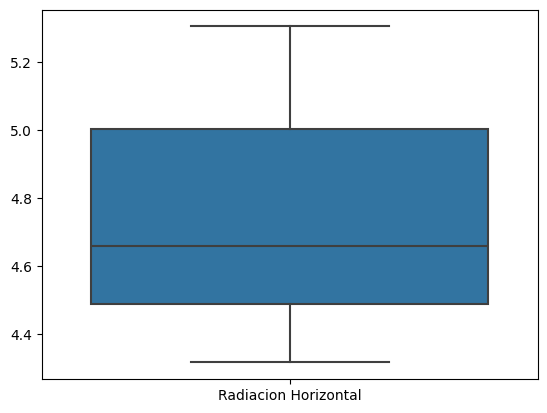

In [97]:
sns.boxplot(df_diario)

In [60]:
estadisticas_mensuales.describe()

,ALLSKY_SFC_SW_DWN
count,12.000000
mean,4.745013
std,0.354454
min,4.316926
25%,4.488215
50%,4.657658
75%,5.002652
max,5.303500


In [11]:
#data.describe().to_csv("../data/estadistica_raw.csv")

Las columnas de este Dataset son las siguientes:
1. DATE_TIME: Las observaciones se realizan cada 15 minutos
2. DV_POWER: Cantidad de energía DC generada por el inversor en el intervalo de 15 minutos
3. AC_POWER: Cantidad de energía generada por el inversor en el intervalo de 15 minutos
4. DAYLY_YIELD: Suma cumulativa de energía generada en el día hasta el punto en que está siendo registrada

# Análisis exploratorio

En este parte del análisis vamos a realizar una comparación de las variables más imnportantes del proceso

In [55]:
data.columns

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'QV2M', 'RH2M', 'PRECTOTCORR',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_KT',
       'ALLSKY_SFC_PAR_TOT', 'TS', 'PS', 'ALLSKY_SFC_LW_DWN',
       'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB',
       'ALLSKY_SFC_UV_INDEX', 'T2MDEW', 'WS2M'],
      dtype='object')

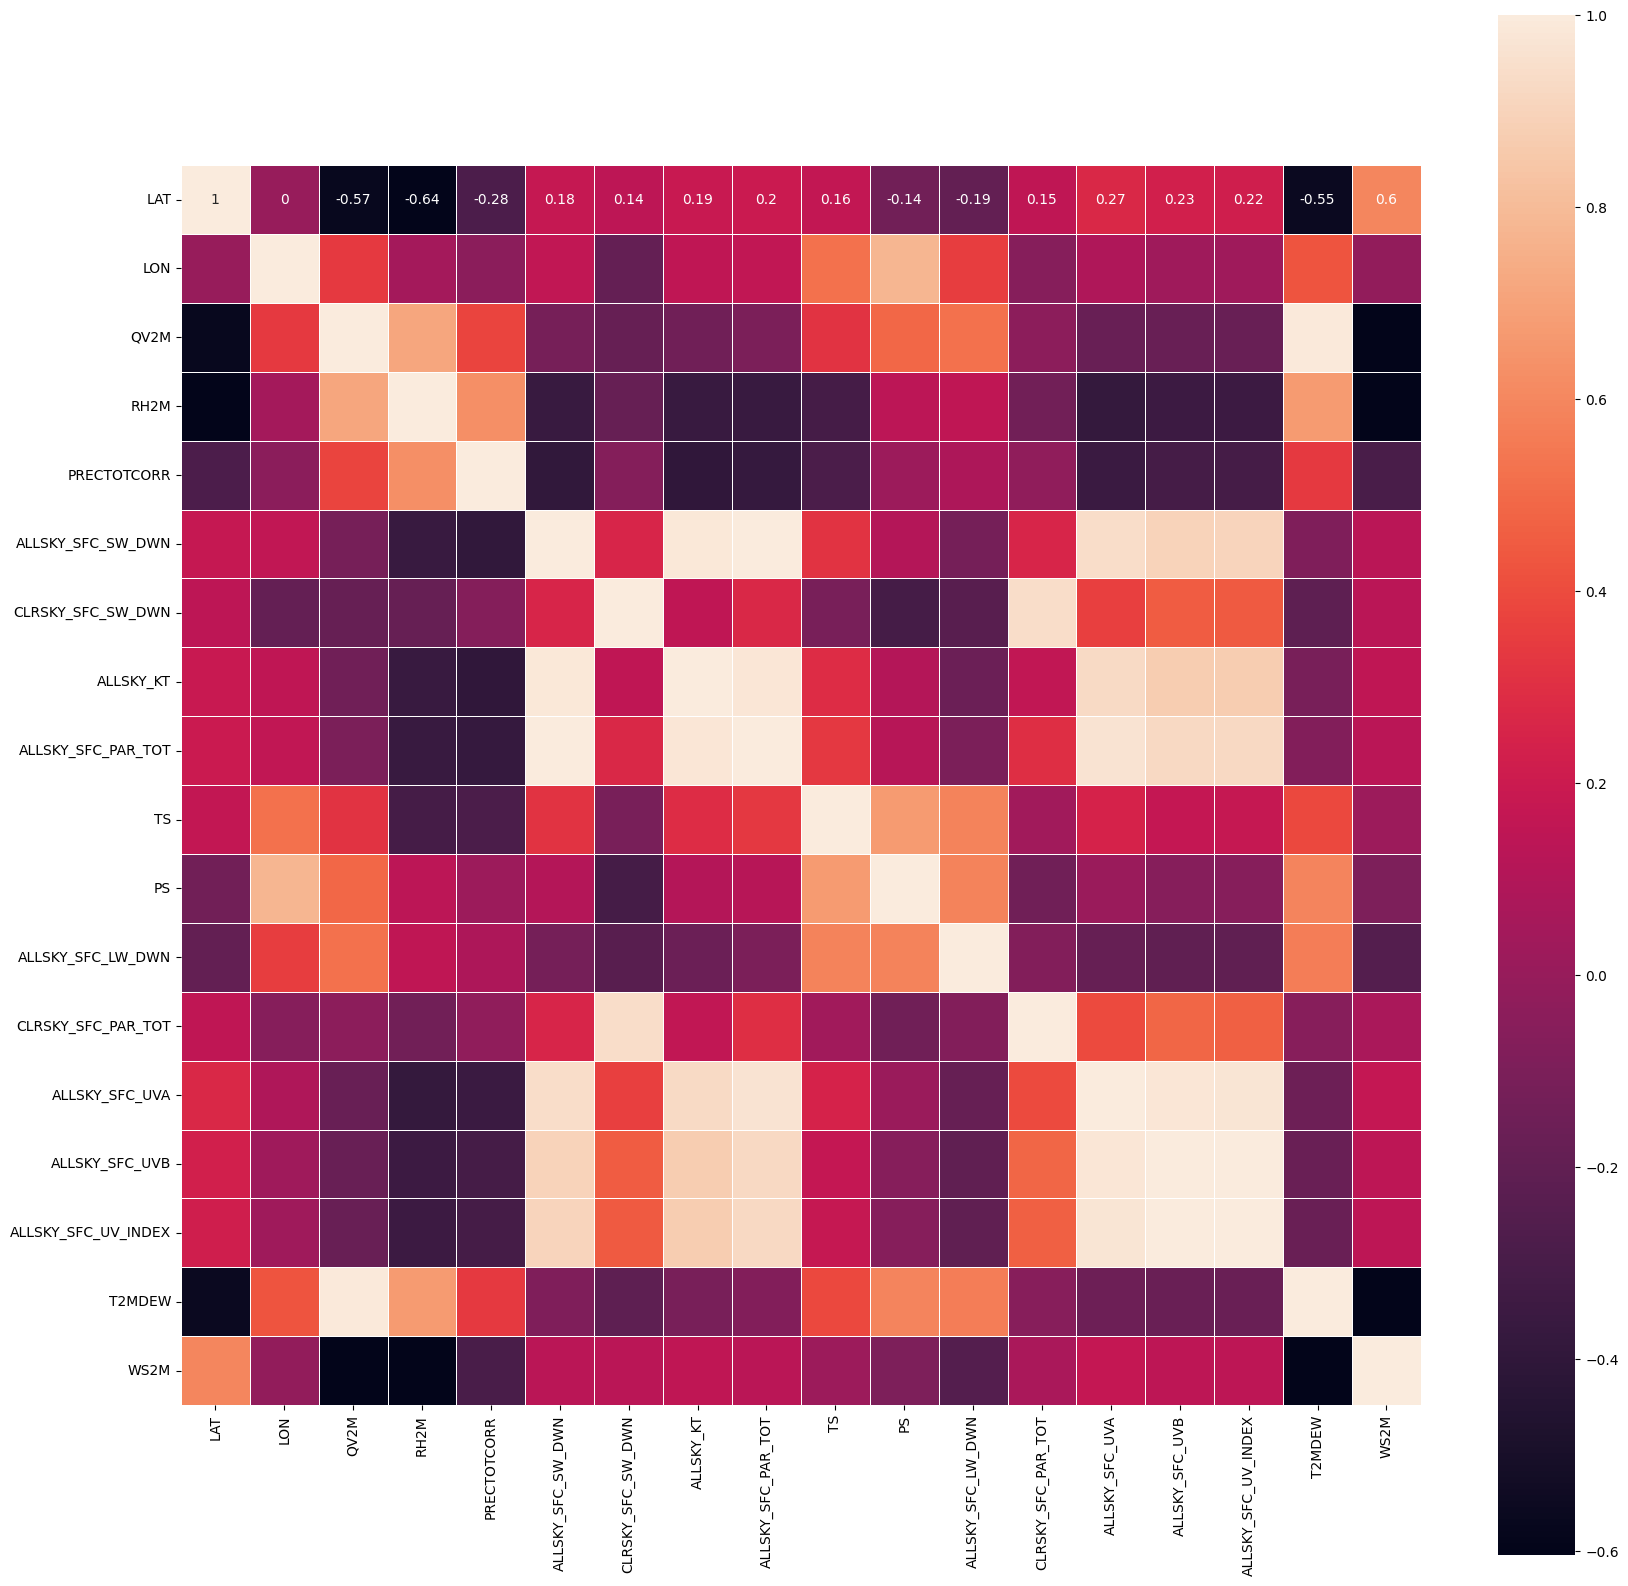

In [6]:
corr = data.drop(columns=['YEAR', 'MO', 'DY']).corr(method = 'spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(corr, robust=True, annot=True, linewidths=.5, square=True)
plt.show()


In [7]:
corr.corr()

,LAT,LON,QV2M,RH2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_PAR_TOT,TS,PS,ALLSKY_SFC_LW_DWN,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2MDEW,WS2M
LAT,1.000000,-0.308899,-0.929753,-0.932200,-0.743170,0.513361,0.452447,0.518762,0.516626,0.041293,-0.485398,-0.606726,0.387617,0.571975,0.555137,0.550907,-0.909658,0.935227
LON,-0.308899,1.000000,0.515806,0.223899,0.024856,-0.176926,-0.672961,-0.154757,-0.179648,0.748294,0.939546,0.695586,-0.593568,-0.280704,-0.350958,-0.345868,0.581517,-0.308487
QV2M,-0.929753,0.515806,1.000000,0.897980,0.696388,-0.592715,-0.618414,-0.592461,-0.592767,0.215443,0.689104,0.799052,-0.526874,-0.664093,-0.669691,-0.665263,0.996523,-0.938533
RH2M,-0.932200,0.223899,0.897980,1.000000,0.903431,-0.724388,-0.500940,-0.723019,-0.727523,-0.220318,0.394685,0.555999,-0.455593,-0.757104,-0.734433,-0.732266,0.867225,-0.899688
PRECTOTCORR,-0.743170,0.024856,0.696388,0.903431,1.000000,-0.829381,-0.397911,-0.828628,-0.830926,-0.416388,0.188084,0.403971,-0.379551,-0.823234,-0.787552,-0.787855,0.656043,-0.703737
ALLSKY_SFC_SW_DWN,0.513361,-0.176926,-0.592715,-0.724388,-0.829381,1.000000,0.474369,0.997614,0.999662,0.191300,-0.320120,-0.562650,0.449517,0.989776,0.973364,0.975145,-0.574427,0.458854
CLRSKY_SFC_SW_DWN,0.452447,-0.672961,-0.618414,-0.500940,-0.397911,0.474369,1.000000,0.424509,0.483991,-0.408519,-0.780842,-0.715575,0.986837,0.575291,0.645649,0.639533,-0.654376,0.423230
ALLSKY_KT,0.518762,-0.154757,-0.592461,-0.723019,-0.828628,0.997614,0.424509,1.000000,0.996185,0.200199,-0.299173,-0.558250,0.394301,0.982791,0.961282,0.963363,-0.571987,0.467440
ALLSKY_SFC_PAR_TOT,0.516626,-0.179648,-0.592767,-0.727523,-0.830926,0.999662,0.483991,0.996185,1.000000,0.196076,-0.321832,-0.558539,0.462063,0.991309,0.975841,0.977506,-0.574666,0.457252
TS,0.041293,0.748294,0.215443,-0.220318,-0.416388,0.191300,-0.408519,0.200199,0.196076,1.000000,0.748679,0.598473,-0.316957,0.098629,0.022389,0.027459,0.286201,-0.034890


In [29]:
corr.to_excel("correlacion.xlsx")

En el mapa de correlaciones se puede obervar que existe una alta correlación entre el únto de rocío y ka temperatura del ambiente. Al igual que hay una correlación entre el altímetro y la presión 

Análisis entre la hora del día y la generación de energía

/tmp/ipykernel_650/3976693828.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data, x="Hour", y="Power(MW)", palette="inferno", label="Medidas durante un año")


Text(0.5, 0, 'Hora del día')

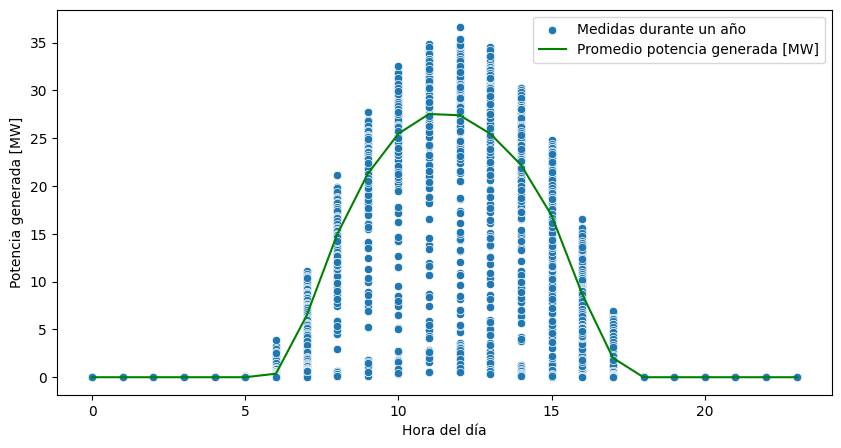

In [63]:
plt.figure(figsize=(10,5))
promedio_generacion_hora=data.groupby(["Hour"])["Power(MW)"].mean().reset_index()
sns.scatterplot(data, x="Hour", y="Power(MW)", palette="inferno", label="Medidas durante un año")
sns.lineplot(promedio_generacion_hora, x="Hour", y="Power(MW)", color="g", label="Promedio potencia generada [MW]")
plt.ylabel("Potencia generada [MW]")
plt.xlabel("Hora del día")

# Análisis de la influencia de las condiciones climáticas

Análisis del mes

In [22]:
generacion_temperatura=data.groupby(["Hour", "Month", "Visibility", "Cloud coverage"])["Solar energy"].mean().reset_index()

KeyError: 'Visibility'

In [ ]:
generacion_temperatura

,Hour,Month,Visibility,Cloud coverage,Solar energy
0,1,1,0.33,1.00,0.0
1,1,1,2.27,1.00,0.0
2,1,1,2.58,1.00,0.0
3,1,1,2.98,1.00,0.0
4,1,1,3.04,0.00,0.0
...,...,...,...,...,...
7461,24,12,10.00,0.00,0.0
7462,24,12,10.00,0.11,0.0
7463,24,12,10.00,0.44,0.0
7464,24,12,10.00,0.67,0.0


/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Hour', ylabel='Solar energy'>

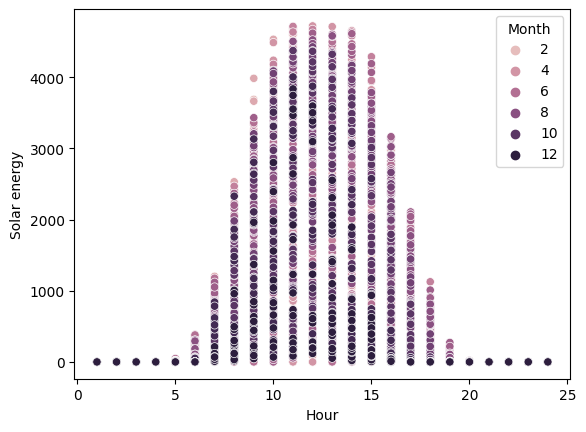

In [12]:
sns.scatterplot(generacion_temperatura, x="Hour", y= "Solar energy", hue="Month")

Al realizar un análsis de la influencia de la temperatura con la generación de energía no se nota una dependencia muy fuerte entre estas dos

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Temperature', ylabel='Solar energy'>

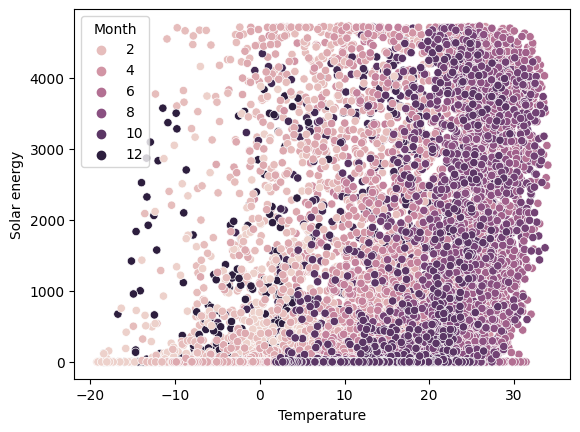

In [13]:
sns.scatterplot(data, y="Solar energy", x= "Temperature", hue="Month")

# Entrenamiento del modelo

In [14]:
data.columns

Index(['LAT', 'LON', 'QV2M', 'RH2M', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN',
       'CLRSKY_SFC_SW_DWN', 'ALLSKY_KT', 'ALLSKY_SFC_PAR_TOT', 'TS', 'PS',
       'ALLSKY_SFC_LW_DWN', 'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA',
       'ALLSKY_SFC_UVB', 'ALLSKY_SFC_UV_INDEX', 'T2MDEW', 'WS2M'],
      dtype='object')

In [13]:
data.drop(labels=["YEAR", "MO", "DY"], axis=1, inplace=True)
# data.set_index("Date", inplace=True)

KeyError: "['YEAR', 'MO', 'DY'] not found in axis"

In [15]:
data_train, data_test= train_test_split(data, test_size=0.2, shuffle=False)

In [16]:
data_train

,LAT,LON,QV2M,RH2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_PAR_TOT,TS,PS,ALLSKY_SFC_LW_DWN,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2MDEW,WS2M
0,-1.25,-76.75,18.98,92.40,7.81,5.84,7.05,0.58,115.73,25.01,97.48,418.62,138.63,15.52,0.48,2.54,23.74,0.12
1,-1.25,-76.25,19.10,91.62,3.62,5.84,7.05,0.58,115.73,25.37,98.02,418.62,138.63,15.52,0.48,2.54,23.94,0.14
2,-1.25,-75.75,19.13,91.48,2.57,6.78,7.11,0.67,134.69,25.42,98.28,412.20,140.80,17.91,0.55,2.95,24.02,0.18
3,-1.25,-75.25,19.19,91.46,2.12,6.78,7.11,0.67,134.69,25.61,98.50,412.20,140.80,17.91,0.55,2.95,24.11,0.17
4,-1.25,-74.75,19.21,91.32,1.59,6.74,7.13,0.67,133.84,25.77,98.64,420.90,141.07,17.91,0.55,2.95,24.15,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,6.25,-69.25,17.49,75.02,0.00,5.10,6.55,0.52,98.62,28.44,99.68,411.82,125.60,12.69,0.37,1.87,22.75,1.48
19116,6.25,-68.75,18.25,80.84,0.00,5.18,6.56,0.52,100.31,26.89,99.78,415.03,125.80,12.86,0.38,1.91,23.48,1.23
19117,6.25,-68.25,18.37,80.27,0.00,5.18,6.56,0.52,100.31,27.01,99.89,415.03,125.80,12.86,0.38,1.91,23.61,1.10
19118,6.25,-67.75,18.53,80.50,0.00,5.75,6.67,0.58,113.31,27.17,99.74,409.33,129.29,14.89,0.44,2.25,23.75,0.92


In [17]:
scaler=StandardScaler()
data_train.iloc[:,:]= scaler.fit_transform(data_train)
data_test.iloc[:,:] = scaler.fit_transform(data_test)

In [18]:
def transform_sequence_from_dataframe(dataset, window_size, target_variable, print_df=False):
    ds=pd.DataFrame(index=range(len(dataset)))
    for cols in dataset.columns.values:
        print(cols)
        for i in range(window_size):
            ds[r"{}+(t+{})".format(cols, i+1)]=dataset[cols].shift(-i).values
    ds[r"{}(t+{})".format(target_variable, i+1)]=dataset[target_variable].shift(-i-1).values
    if print_df:
        print(ds.head())
    ds.dropna(inplace=True)
    X=ds.iloc[:,:-1].to_numpy().reshape((-1, window_size, len(dataset.columns)))
    Y=ds.iloc[:,-1].to_numpy().reshape((-1,1))
    return X, Y

In [20]:
x_train, y_train=transform_sequence_from_dataframe(data_train, 10,"CLRSKY_SFC_SW_DWN", print_df=True)

LAT
LON
QV2M
RH2M
PRECTOTCORR
ALLSKY_SFC_SW_DWN
CLRSKY_SFC_SW_DWN
ALLSKY_KT
ALLSKY_SFC_PAR_TOT
TS
PS
ALLSKY_SFC_LW_DWN
CLRSKY_SFC_PAR_TOT
ALLSKY_SFC_UVA
ALLSKY_SFC_UVB
ALLSKY_SFC_UV_INDEX
T2MDEW
WS2M
   LAT+(t+1)  LAT+(t+2)  LAT+(t+3)  LAT+(t+4)  LAT+(t+5)  LAT+(t+6)  \
0  -1.647103  -1.647103  -1.647103  -1.647103  -1.647103  -1.647103   
1  -1.647103  -1.647103  -1.647103  -1.647103  -1.647103  -1.647103   
2  -1.647103  -1.647103  -1.647103  -1.647103  -1.647103  -1.647103   
3  -1.647103  -1.647103  -1.647103  -1.647103  -1.647103  -1.647103   
4  -1.647103  -1.647103  -1.647103  -1.647103  -1.647103  -1.647103   

   LAT+(t+7)  LAT+(t+8)  LAT+(t+9)  LAT+(t+10)  ...  WS2M+(t+2)  WS2M+(t+3)  \
0  -1.647103  -1.647103  -1.647103   -1.647103  ...   -0.649649   -0.603277   
1  -1.647103  -1.647103  -1.647103   -1.647103  ...   -0.603277   -0.614870   
2  -1.647103  -1.647103  -1.647103   -1.647103  ...   -0.614870   -0.649649   
3  -1.647103  -1.647103  -1.647103   -1.647103  ...   -0.

/tmp/ipykernel_279/1496463295.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ds[r"{}+(t+{})".format(cols, i+1)]=dataset[cols].shift(-i).values
/tmp/ipykernel_279/1496463295.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ds[r"{}+(t+{})".format(cols, i+1)]=dataset[cols].shift(-i).values
/tmp/ipykernel_279/1496463295.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

In [21]:
print(y_train)

[[ 0.9808866 ]
 [ 0.9808866 ]
 [ 0.92337235]
 ...
 [-0.71578381]
 [-0.39945543]
 [-0.39945543]]
